# Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

### Цель - определение параметров будущей модели путем проведения разведывательного анализа данных.


In [3]:
# импортируем нужные для чтения и первичного анализа библиотеки и загрузим файл
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('E:/stud_math.csv')

In [2]:
display(math.head(10)) # Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
math.shape # проверим на дублирование данных и удалим их если они есть!

(395, 30)

In [4]:
math=math.drop_duplicates()
math.shape

(395, 30)

##
Как видно дублированных записей нет!

In [60]:
# Для удобства использования pandas переименуем столбец 'studytime, granular' в 'st_gran'
math.rename(columns={'studytime, granular': 'st_gran'}, inplace=True)

## Теперь рассмотрим все столбцы по отдельности. Начнем со столбца - school:

['GP' 'MS']
2


(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

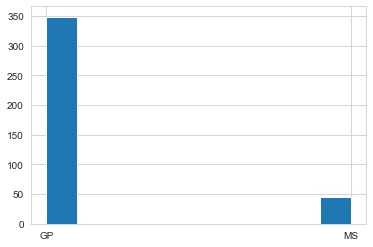

In [5]:
print(math.school.unique()) # посмотрим колличество уникальных значений
print(math.school.nunique()) # посмотрим колличество неуникальных значений
plt.hist(math.school) # построим гистограмму распределения по школам

## 

Из распределения на данном графике можно сделать следующие выводы:

1 в представленном датасете проводится анализ двух школ;

2 В школе GP - учатся 349 учеников из выборки;

3 В школе MS - учатся 46 учеников;

Все это говорит о том что школа GP популярнее MS в 7 раз!

## Теперь рассмотрим столбец - sex:

['F' 'M']


(array([208.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

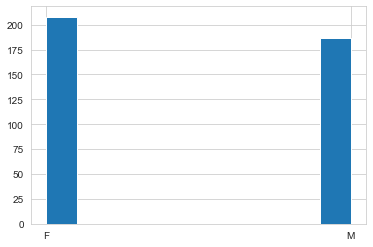

In [103]:
print(math.sex.unique()) # посмотрим колличество уникальных значений
plt.hist(math.sex) # построим гистограмму распределения по школам

## 

Из распределения на данном графике можно сделать следующие выводы

1 В данной выборке пока еще учитывается два пола детей :);

2 Распределение по полу равное (208 девочек против 187 юношей)

## Посмотрим на распределение учеников по возрасту

In [7]:
math.age = math.age.astype(str) # создаем функцию math.age с преобразованием изначальных данных в текст
display(pd.DataFrame(math.age.value_counts())) # выводим результат колонки age в виде таблицы
print("Уникальных значений:", math.age.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['age']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


<AxesSubplot:>

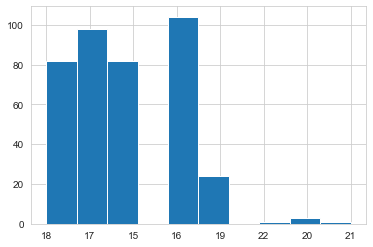

In [8]:
# Посмотрим распределение учеников по возрасту на гистграмме:
math.age.hist()

## 

Здесь мы видим что:
 - в выборке участвует 395 учеников
 - из них более всего 15-19 летних
 - 20-22 летних учеников всего четверо (что говорит нам что их можно расценивать как "выброс")

## Теперь рассмотри столбец address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [63]:
display(pd.DataFrame(math.address.value_counts())) # выводим результат колонки address в виде таблицы
print("Уникальных значений:", math.address.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['address']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,address
U,295
R,83
nan,17


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, что среди учащихся 295 - это городские жители, а 83 - живут загородом. Также есть 17 незаполненых значений

## Рассмотри столбец famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [64]:
display(pd.DataFrame(math.famsize.value_counts())) # выводим результат колонки famsize в виде таблицы
print("Уникальных значений:", math.famsize.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['famsize']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,famsize
GT3,261
LE3,107
nan,27


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, что среди учащихся 261 - имеют семьи более 3 человек, 

а 107 - менее менее 3 человек в семье или это семьи с одним ребенком. 

Также есть 27 незаполненых значений

## Рассмотрим столбец Pstatus — статус совместного жилья родителей

In [65]:
math['Pstatus'] = math['Pstatus'].replace('T', 'вместе' ) # для удобства изменим значения "Т" на "вместе" 
math['Pstatus'] = math['Pstatus'].replace('A', 'раздельно' )# для удобства изменим значения "А" на "раздельно"
display(pd.DataFrame(math.Pstatus.value_counts())) # выводим результат колонки Pstatus в виде таблицы
print("Уникальных значений:", math.Pstatus.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Pstatus']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Pstatus
вместе,314
nan,45
раздельно,36


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, что у 314 учащихся - родители живут совместно, 

а у 36 - раздельно. 

Также есть 45 незаполненых значений

## Рассмотрим столбец Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [12]:
math.Medu = math.Medu.astype(str) # создаем функцию math.Medu с преобразованием изначальных данных в текст
display(pd.DataFrame(math.Medu.value_counts())) # выводим результат колонки Medu в виде таблицы
print("Уникальных значений:", math.Medu.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Medu']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
nan,3
0.0,3


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Medu    395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, что у 131 учащегося - у матери высшее образование и еще у 97 среднее, а значит они могут помочь в подготовке
к тестовому экзамену по математике, 

у 102 учащихся - у матери образование 5-9 классов, а значит они тоже могут помочь в подготовке к экзамену.

Также есть 3 незаполненых значения.

## Рассмотрим столбец Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [66]:
math.Fedu = math.Fedu.astype(float) # создаем функцию math.Fedu с преобразованием изначальных данных
display(pd.DataFrame(math.Fedu.value_counts())) # выводим результат колонки Fedu в виде таблицы
print("Уникальных значений:", math.Fedu.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Fedu']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


## 
Так как в отображаеммом результате кроме значений 0 - 4 есть значение 40, то предположим что это ошибка при наборе данных. Исправим ее: 


In [71]:
math['Fedu'] = math['Fedu'].replace('40.0', '4.0' )

In [72]:
math.Fedu = math.Fedu.astype(str) # создаем функцию math.Fedu с преобразованием изначальных данных в текст
display(pd.DataFrame(math.Fedu.value_counts())) # выводим результат колонки Fedu в виде таблицы
print("Уникальных значений:", math.Fedu.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Fedu']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
nan,24
0.0,2


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fedu    395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, что у 89 учащегося - у отца высшее образование и еще у 96 среднее, а значит они могут помочь в подготовке
к тестовому экзамену по математике, 

у 106 учащегося - у отца образование 5-9 классов, а значит они тоже могут помочь в подготовке к экзамену.

Также есть 24 незаполненых значения.

## Рассмотрим столбец Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [73]:
display(pd.DataFrame(math.Mjob.value_counts())) # выводим результат колонки Mjob в виде таблицы
print("Уникальных значений:", math.Mjob.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Mjob']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, 55 учащегося матери работают учетелями, а у 58 не работают что означает что они способны помочь в сдаче гос экзамена. Так же есть 19 незаполненых значений.

## Рассмотрим столбец Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [74]:
display(pd.DataFrame(math.Fjob.value_counts())) # выводим результат колонки Fjob в виде таблицы
print("Уникальных значений:", math.Fjob.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['Fjob']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,Fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим, 29 учащегося отцы работают учетелями, а у 16 не работают что означает что они способны помочь в сдаче 
гос экзамена. В столбце есть 36 незаполненных значения.

## Рассмотрим столбец reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [75]:
display(pd.DataFrame(math.reason.value_counts())) # выводим результат колонки reason в виде таблицы
print("Уникальных значений:", math.reason.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['reason']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,reason
course,137
home,104
reputation,103
other,34
nan,17


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 
Здесь мы видим, что:
- 137 детей выбрали школу из-за образовательной программы; 
- 104 из-за близости к дому;
- 103 из-за репутации школы;
- 34 по другим причинам.

Так же в столбце есть 17 незаполненых граф.

## Рассмотрим столбец guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [76]:
display(pd.DataFrame(math.guardian.value_counts())) # выводим результат колонки guardian в виде таблицы
print("Уникальных значений:", math.guardian.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['guardian']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,guardian
mother,250
father,86
nan,31
other,28


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 
Не понятно что означает этот столбец и как он совмещается со стольцом Pstatus.


## Рассмотрим столбец traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [79]:
math.traveltime = math.traveltime.astype(str) # создаем функцию math.traveltime с преобразованием изначальных данных в текст
display(pd.DataFrame(math.traveltime.value_counts())) # выводим результат колонки traveltime в виде таблицы
print("Уникальных значений:", math.traveltime.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['traveltime']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,traveltime
1.0,242
2.0,96
nan,28
3.0,22
4.0,7


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 
Данный столбец говорит нам, что большинство детей (242) живут в рядом со школой, 96 - в пешей доступности, 22 ученика затрачивают на дорогу до школы значительное время, и 7 учеников должны пользоваться транспортом. Так же есть 28 незаполненых граф.

## Рассмотрим столбец studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [21]:
math.studytime = math.studytime.astype(str) # создаем функцию math.studytime с преобразованием изначальных данных в текст
display(pd.DataFrame(math.studytime.value_counts())) # выводим результат колонки studytime в виде таблицы
print("Уникальных значений:", math.studytime.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['studytime']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
nan,7


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   studytime  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 
Здесь мы видим что абсолютное большинство использует свободное время на учебу помимо школы, только 7 детей не пользуются дополнительнм обучением.

## Рассмотрим столбец failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [22]:
math.failures = math.failures.astype(str) # создаем функцию math.failures с преобразованием изначальных данных в текст
display(pd.DataFrame(math.failures.value_counts())) # выводим результат колонки failures в виде таблицы
print("Уникальных значений:", math.failures.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['failures']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,failures
0.0,293
1.0,49
nan,22
2.0,16
3.0,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   failures  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что большинство учеников не имеют внеучебных неудач

## Рассмотрим столбец schoolsup — дополнительная образовательная поддержка (yes или no)

In [80]:
display(pd.DataFrame(math.schoolsup.value_counts())) # выводим результат колонки schoolsup в виде таблицы
print("Уникальных значений:", math.schoolsup.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['schoolsup']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,schoolsup
no,335
yes,51
nan,9


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что большинство учеников не имеют дополнительную образовательную поддержку

## Рассмотрим столбец famsup — семейная образовательная поддержка (yes или no)

In [81]:
display(pd.DataFrame(math.famsup.value_counts())) # выводим результат колонки famsup в виде таблицы
print("Уникальных значений:", math.famsup.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['famsup']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,famsup
yes,219
no,137
nan,39


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 219 учеников имеют семейную образовательную поддержку,  а 137 не имеют.

## Рассмотрим столбец paid — дополнительные платные занятия по математике (yes или no)

In [82]:
display(pd.DataFrame(math.paid.value_counts())) # выводим результат колонки paid в виде таблицы
print("Уникальных значений:", math.paid.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['paid']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,paid
no,200
yes,155
nan,40


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 155 учеников платно занимаются математикой

## Рассмотрим столбец activities — дополнительные внеучебные занятия (yes или no)

In [83]:
display(pd.DataFrame(math.activities.value_counts())) # выводим результат колонки activities в виде таблицы
print("Уникальных значений:", math.activities.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['activities']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,activities
yes,195
no,186
nan,14


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 195 учеников помимо математике имеют дополнительные внеучебные занятия, а 186 не имеют таких занятий.

## Рассмотрим столбец nursery — посещал детский сад (yes или no)

In [84]:
display(pd.DataFrame(math.nursery.value_counts())) # выводим результат колонки nursery в виде таблицы
print("Уникальных значений:", math.nursery.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['nursery']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,nursery
yes,300
no,79
nan,16


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 300 учеников посещали детский сад, а 79 нет. Так же по 16 ученикам нет данных.

## Рассмотрим столбец st_gran

In [62]:
math.st_gran = math.st_gran.astype(str) # создаем функцию math.st_gran с преобразованием изначальных данных в текст
display(pd.DataFrame(math.st_gran.value_counts())) # выводим результат колонки st_gran в виде таблицы
print("Уникальных значений:", math.st_gran.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['st_gran']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,st_gran
-6.0,194
-3.0,103
-9.0,64
-12.0,27
nan,7


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   st_gran  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 'studytime, granular' переименованная в 'st_gran' имеет четыре значения:
- -3
- -6
- -9
- -12

Так же имеется 7 незаполненных значений.

## Рассмотрим столбец higher — хочет получить высшее образование (yes или no)

In [85]:
display(pd.DataFrame(math.higher.value_counts())) # выводим результат колонки higher в виде таблицы
print("Уникальных значений:", math.higher.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['higher']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,higher
yes,356
nan,20
no,19


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 356 учеников желают получить высшее образование, а значит должны хотеть положительно сдать итоговый экзамен по математике.

## Рассмотрим столбец internet — наличие интернета дома (yes или no)

In [86]:
display(pd.DataFrame(math.internet.value_counts())) # выводим результат колонки internet в виде таблицы
print("Уникальных значений:", math.internet.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['internet']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,internet
yes,305
no,56
nan,34


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 305 учеников имеют интернет дома, а значит могут получать дополнительную информацию по математике.

##  Рассмотрим столбец romantic — в романтических отношениях (yes или no)

In [87]:
display(pd.DataFrame(math.romantic.value_counts())) # выводим результат колонки romantic в виде таблицы
print("Уникальных значений:", math.romantic.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['romantic']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,romantic
no,240
yes,124
nan,31


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что только 124 ученика имеют романтические отношения, но большинство (240 учеников) в отношениях не состоят.

## Рассмотрим столбец famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [31]:
math.famrel = math.famrel.astype(str) # создаем функцию math.famrel с преобразованием изначальных данных в текст
display(pd.DataFrame(math.famrel.value_counts())) # выводим результат колонки famrel в виде таблицы
print("Уникальных значений:", math.famrel.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['famrel']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,famrel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,7
-1.0,1


Уникальных значений: 7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [32]:
# Так как в отображаеммом результате кроме значений 1 - 4 есть значение '-1', то предположим что это ошибка при наборе данных. Исправим ее:
math['famrel'] = math['famrel'].replace('-1.0', '1.0' ) # для удобства изменим значения "-1.0" на "1.0" 

In [33]:
# Рассмотрим столбец famrel заново:
math.famrel = math.famrel.astype(str) # создаем функцию math.famrel с преобразованием изначальных данных в текст
display(pd.DataFrame(math.famrel.value_counts())) # выводим результат колонки famrel в виде таблицы
print("Уникальных значений:", math.famrel.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['famrel']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,famrel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,8


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 
Здесь мы видим что у 25 детей (17 - плохо и 8 - очень плохо) есть проблемы в семьях. Так же по 27 ученикам нет данных.

## Рассмотрим столбец freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [34]:
math.freetime = math.freetime.astype(str) # создаем функцию math.freetime с преобразованием изначальных данных в текст
display(pd.DataFrame(math.freetime.value_counts())) # выводим результат колонки freetime в виде таблицы
print("Уникальных значений:", math.freetime.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['freetime']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
nan,11


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   freetime  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что у 81 детей (18 - очень мало и 63 - мало) мало свободного времени после школы. Так же по 11 ученикам нет данных.

## Рассмотрим столбец goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [35]:
math.goout = math.goout.astype(str) # создаем функцию math.goout с преобразованием изначальных данных в текст
display(pd.DataFrame(math.goout.value_counts())) # выводим результат колонки goout в виде таблицы
print("Уникальных значений:", math.goout.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['goout']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
nan,8


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   goout   395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что 52 ученика проводят много времени с друзьями, а 23 с друзьями почти не видятся. По 8 ученикам нет данных.

## Рассмотрим столбец health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [36]:
math.health = math.health.astype(str) # создаем функцию math.health с преобразованием изначальных данных в текст
display(pd.DataFrame(math.health.value_counts())) # выводим результат колонки health в виде таблицы
print("Уникальных значений:", math.health.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['health']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
nan,15


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


## 

Здесь мы видим что у 47 детей есть большие проблемы со здоровьем, у 43 оно так же - плохое. По 15 ученикам нет данных.

## Рассмотрим столбец absences — количество пропущенных занятий

In [37]:
math.absences = math.absences.astype(str) # создаем функцию math.absences с преобразованием изначальных данных в текст
display(pd.DataFrame(math.absences.value_counts())) # выводим результат колонки absences в виде таблицы
print("Уникальных значений:", math.absences.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['absences']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
nan,12
3.0,8


Уникальных значений: 37
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [38]:
#Посмотрим на распределение оценок:
math.absences.describe()

count     395
unique     37
top       0.0
freq      111
Name: absences, dtype: object

## 
Здесь мы видим что среднее значение пропусков - 7,28. Максимальное число пропущенных занятий - 385,
а минимальное количество - 0. Так же мы видим что 75 % учеников пропустили 8 и менее занятий. По 12 ученикам нет данных.

## Рассмотрим столбец score — баллы по госэкзамену по математике

In [39]:
math.score = math.score.astype(str) # создаем функцию math.score с преобразованием изначальных данных в текст
display(pd.DataFrame(math.score.value_counts())) # выводим результат колонки score в виде таблицы
print("Уникальных значений:", math.score.nunique()) # вывод количества уникальных значений в колонке
math.loc[:, ['score']].info() # получение строк с нужными индексными значениями и вывод сведений о датафрейме

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


Уникальных значений: 19
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [40]:
#Посмотрим на распределение оценок:
math.score.describe()

count      395
unique      19
top       50.0
freq        54
Name: score, dtype: object

## 
Здесь мы видим что среднее значение баллов - 52,26. Максимальное число - 100 баллов (1 ученик),
а минимальное количество - 0 (37 ученика). По 6 ученикам нет данных.

In [88]:
display(math.head(10)) # Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nan,раздельно,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,вместе,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,вместе,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,вместе,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,вместе,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,nan,LE3,вместе,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,раздельно,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,раздельно,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,nan,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,nan,nan,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int32  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    object 
 7   Fedu        395 non-null    object 
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    object 
 13  studytime   395 non-null    object 
 14  failures    395 non-null    object 
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [93]:
# Вернем преабразованным функциям первоначальные значения:
math.age = math.age.astype(int)
math.Medu = math.Medu.astype(float)
math.Fedu = math.Fedu.astype(float)
math.traveltime = math.traveltime.astype(float)
math.studytime = math.studytime.astype(float)
math.failures = math.failures.astype(float)
math.st_gran = math.st_gran.astype(float)
math.famrel = math.famrel.astype(float)
math.freetime = math.freetime.astype(float)
math.goout = math.goout.astype(float)
math.health = math.health.astype(float)
math.absences = math.absences.astype(float)
math.score = math.score.astype(float)

In [94]:
math.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int32  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

## Корреляционный анализ

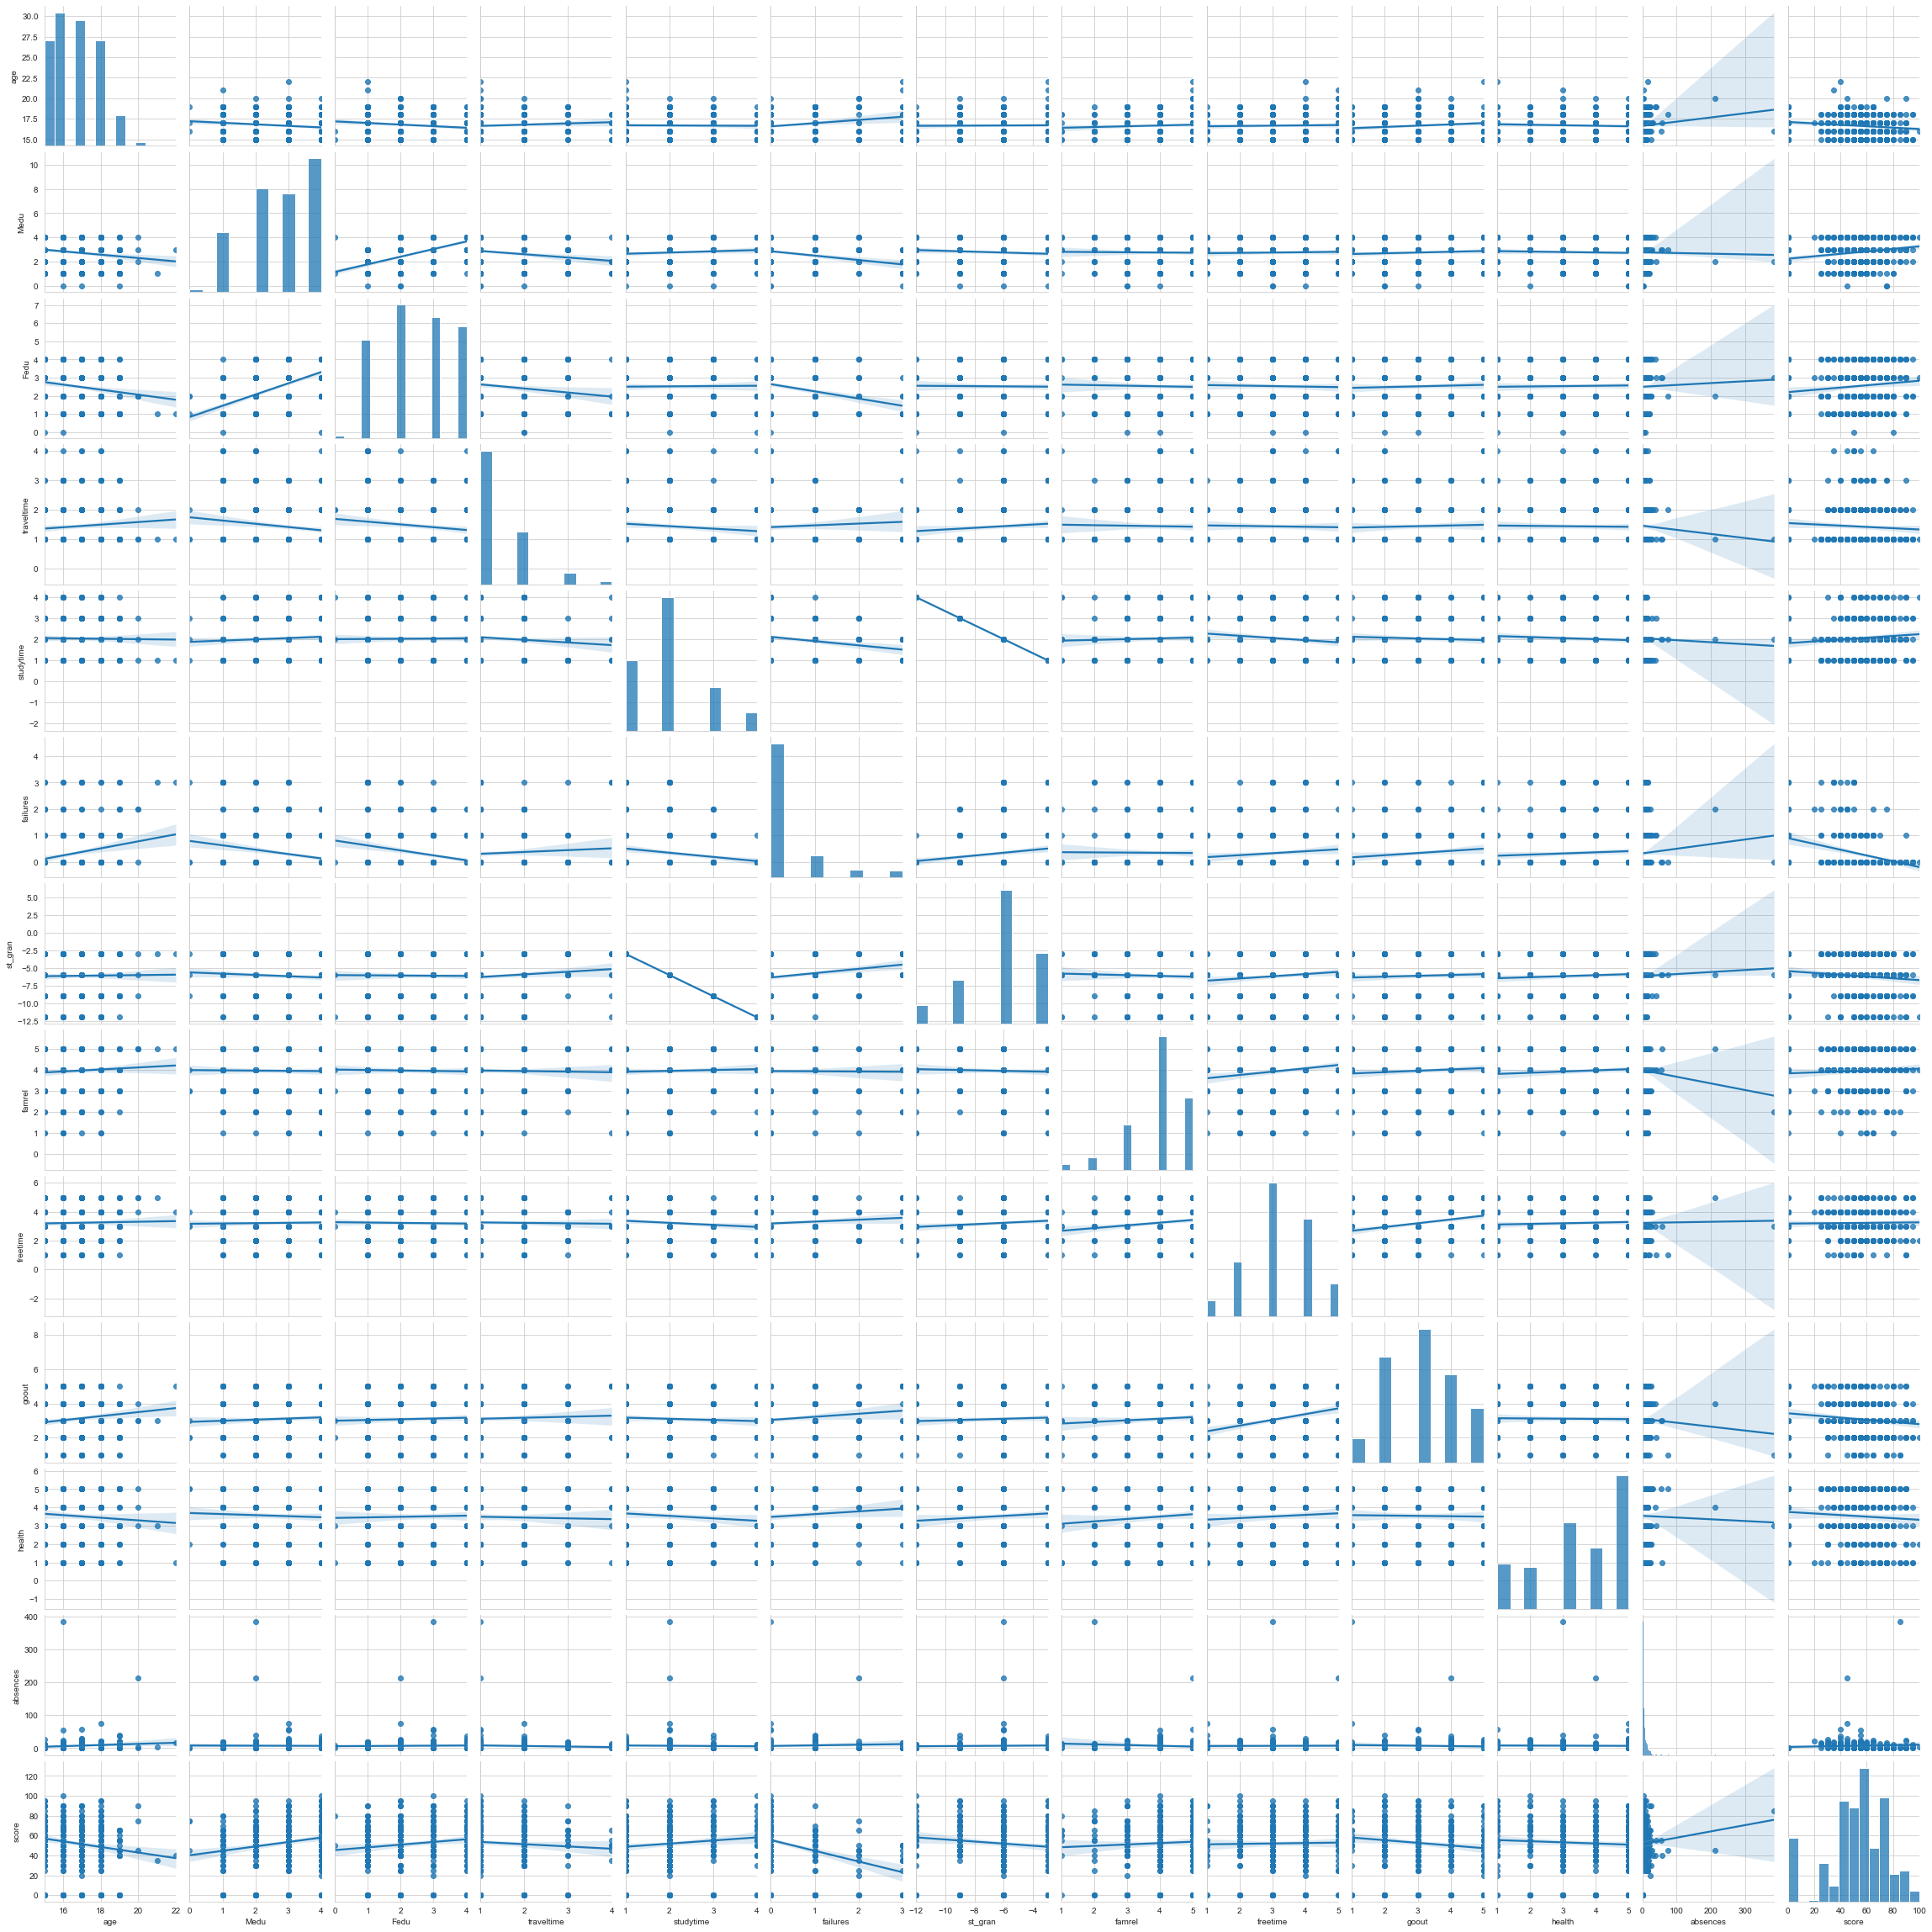

In [106]:
sns.pairplot(math, kind = 'reg')

In [107]:
math.corr() # Используем для наглядности матрицу корреляций

,age,Medu,Fedu,traveltime,studytime,failures,st_gran,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
st_gran,0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685


## вывод корреляции:

- переменные studytime и st_gran скоррелированы почти полностью, переменную st_gran можно исключить;

## Анализ номинативных переменных

In [100]:
'''Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. 
Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. 
Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).
Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.
Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.'''
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

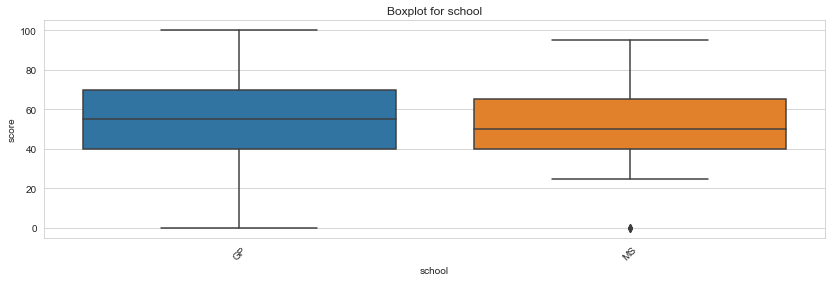

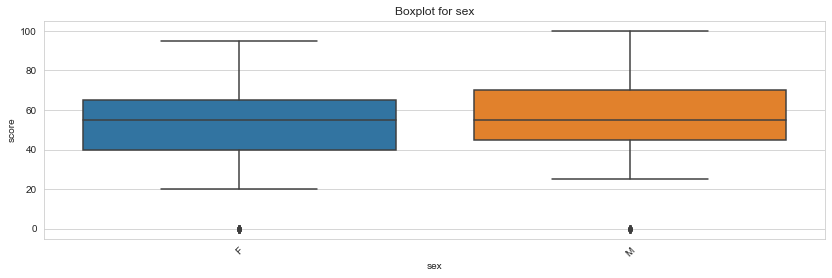

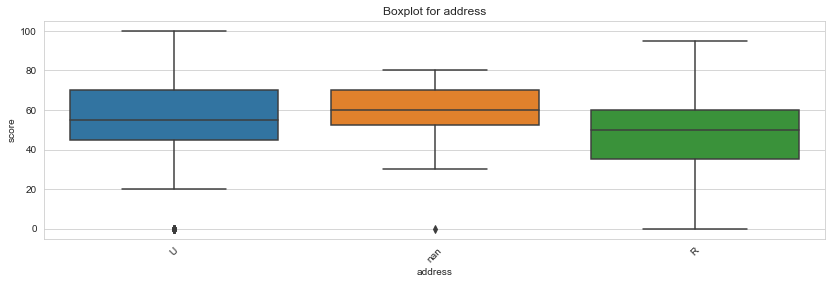

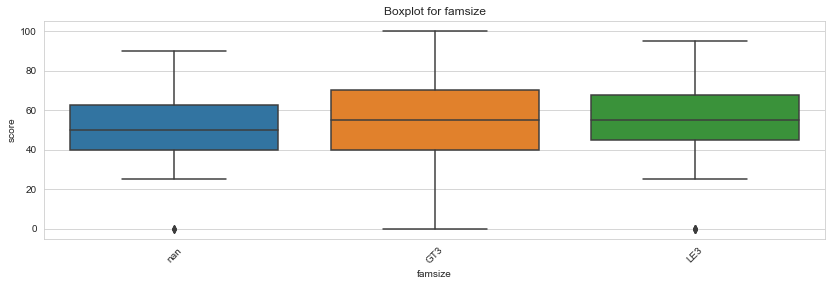

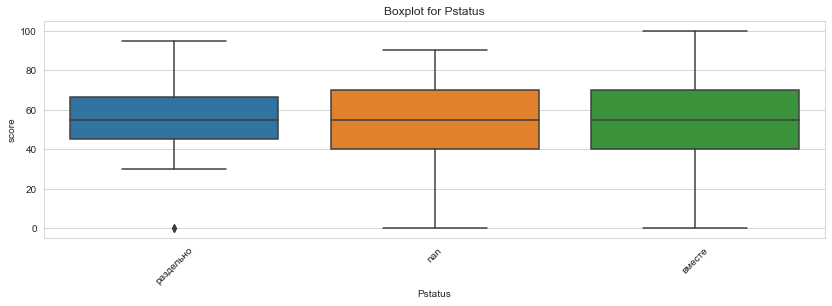

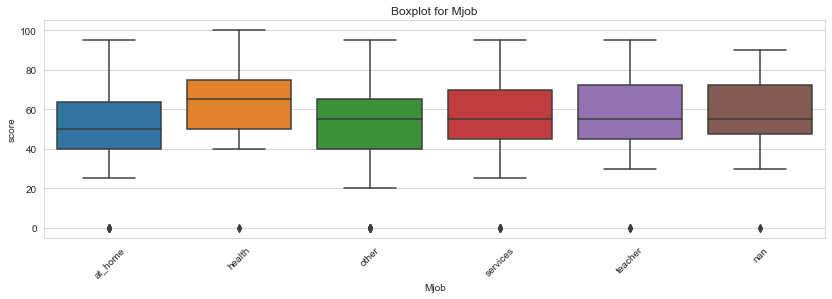

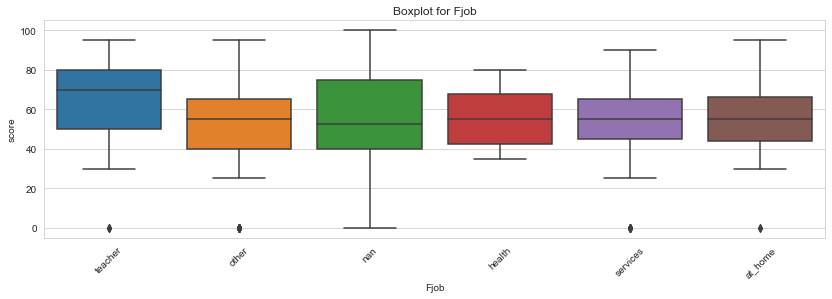

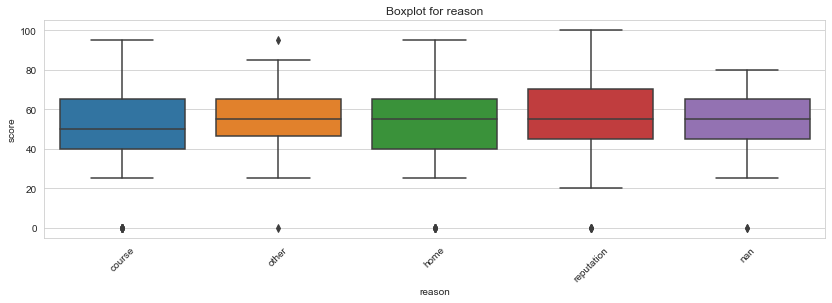

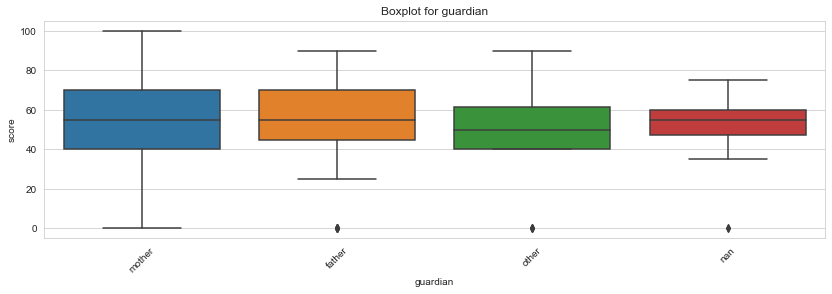

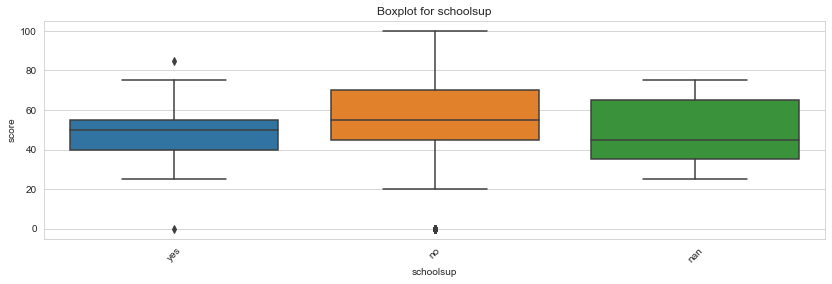

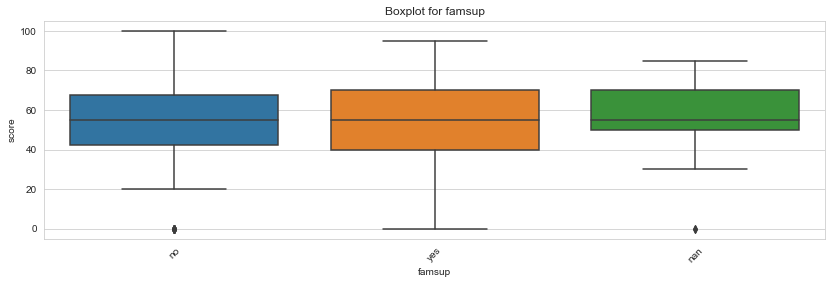

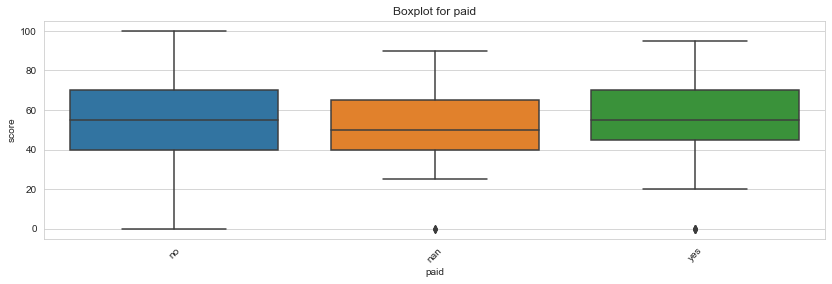

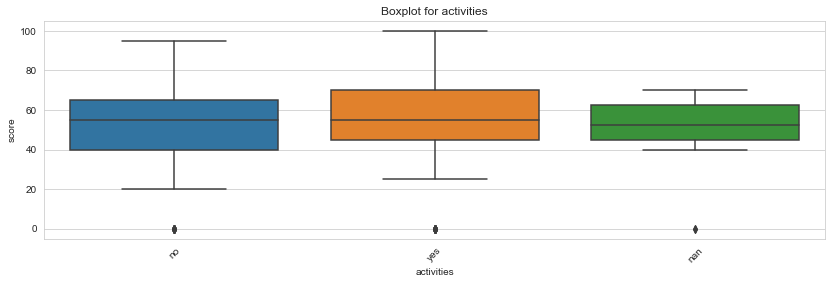

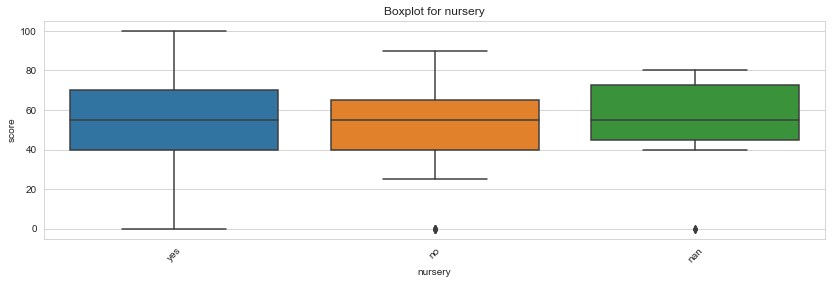

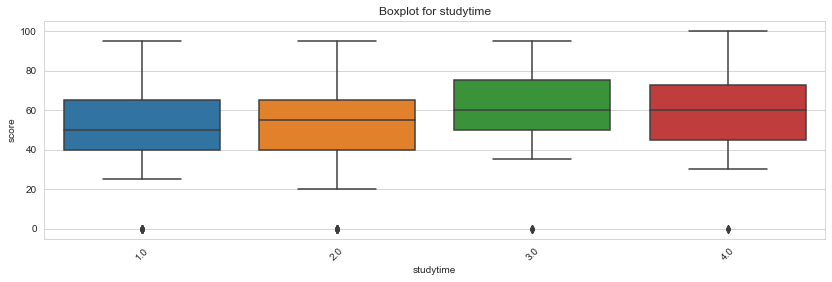

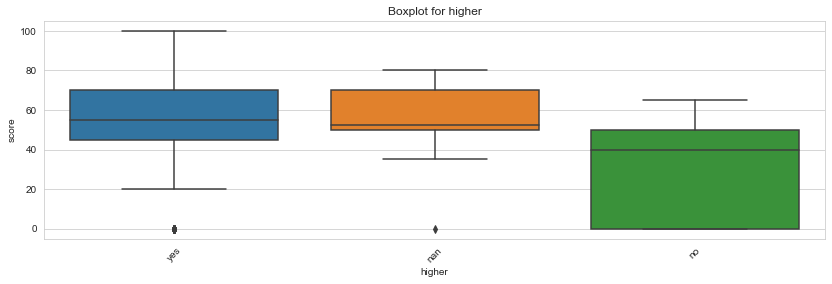

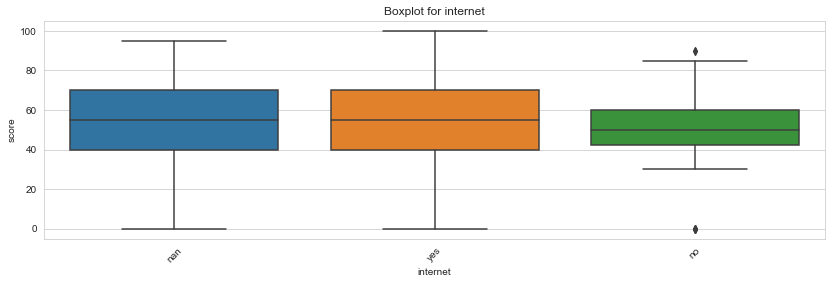

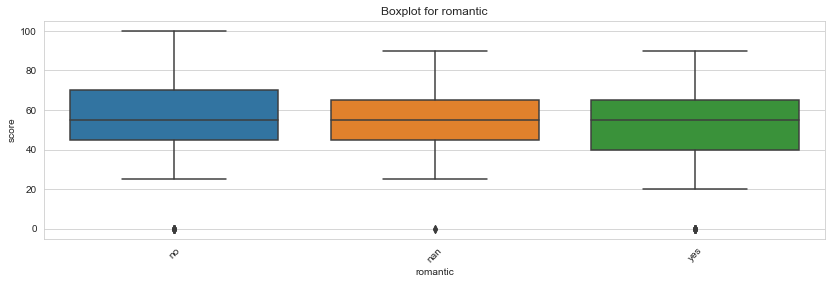

In [101]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime', 'higher', 'internet', 'romantic',]:
    get_boxplot(col)

In [104]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                       math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [110]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime', 'higher', 'internet', 'romantic',]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher


##
Как видно, серьёзно отличается только параметр: higher. Оставим этe переменные в датасете для дальнейшего построения модели. 

В результате имеем переменные которые, возможно, влияют на построение модели: age, Medu, Fedu, traveltime, studytime, failures, higher, romantic, famrel, freetime, goout, health и absences.

In [8]:
math_for_model = math.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher',
                              'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']]
math_for_model.head(8)

,age,Medu,Fedu,traveltime,studytime,failures,higher,romantic,famrel,freetime,goout,health,absences
0,18,4.0,4.0,2.0,2.0,0.0,yes,no,4.0,3.0,4.0,3.0,6.0
1,17,1.0,1.0,1.0,2.0,0.0,yes,no,5.0,3.0,3.0,3.0,4.0
2,15,1.0,1.0,1.0,2.0,3.0,yes,NaN,4.0,3.0,2.0,3.0,10.0
3,15,4.0,2.0,1.0,3.0,0.0,yes,yes,3.0,2.0,2.0,5.0,2.0
4,16,3.0,3.0,1.0,2.0,0.0,yes,no,4.0,3.0,2.0,5.0,4.0
5,16,4.0,3.0,1.0,2.0,0.0,yes,no,5.0,4.0,2.0,5.0,10.0
6,16,2.0,2.0,1.0,2.0,0.0,yes,no,4.0,4.0,4.0,3.0,0.0
7,17,4.0,4.0,2.0,2.0,0.0,yes,no,4.0,1.0,4.0,1.0,6.0


# Выводы:

## 
В результате EDA для анализа влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:
- в данных достаточно мало пустых значений;
- городская школа в 7 раз популярнее;
- в целом юношы сдают итоговый экзамен лучше чем девушки;
- на итоговую оценку сильно влияет желание получить высшее образование;
- так же для дальнейшего построения модели необходимо учитывать следующие параметры: age, Medu, Fedu, traveltime, studytime, failures, romantic, famrel, freetime, goout, health и absences.

In [1]:
# В работе не удалось использовать функцию, которую можно применять к столбцам определённого типа.
# Так же не удалось установить библиотеку autopep8.